# Project : Investigate a Dataset (Titanic Data)

### Author : Adhitya Wicaksono Putro
#### Project Purpose : This project is a requirement in obtaining Data Analyst Nanodegree provided by Udacity

## 1. Description
In this project I would like to analyze interesting findings about Titanic dataset. The data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. After analyzing the data, here are a couple of questions I would like to answer:

1. What are the factors contribute to passenger's survival?
2. What is the relationship between passenger's age and ticket fare?
3. Are women more likely to bring larger siblings or spouse compared to men?

## 2. Data Wrangling & Exploration
### 2.1. Load Modules & Dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df_titanic = pd.read_csv('titanic_data.csv')

### 2.2. Question 1 : Factors of Passenger's Survival

In [2]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The table above displays a glimpse of the data. We will exclude Name, PassengerId, Ticket, and Cabin since these are considered label variables therefore not relevant in answering the question.

In [3]:
df_titanic.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
#Drop unecessary columns
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 2.2.1 Ticket Class
We will analyze the correlation between ticket class and passenger's survival.

In [289]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Pclass'])

#Count total passengers per class
df_pclass = df.groupby('Pclass').count()
df_pclass.columns = ['Total Passengers']
print df_pclass

False
        Total Passengers
Pclass                  
1                    216
2                    184
3                    491


In [241]:
#Count survivors
df_survived = df[df['Survived'] == 1].groupby('Pclass').count()
print df_survived

        Survived
Pclass          
1            136
2             87
3            119


In [242]:
#Merge the dataframes and compute survival rate for each class
df_pclass = pd.merge(df_pclass, df_survived, left_index=True, right_index=True)
df_pclass['SurvivalRate'] = (df_pclass['Survived'] * 100.0 / df_pclass['Total Passengers']).round(2)
df_pclass

,Total Passengers,Survived,SurvivalRate
Pclass,,,
1,216,136,62.96
2,184,87,47.28
3,491,119,24.24


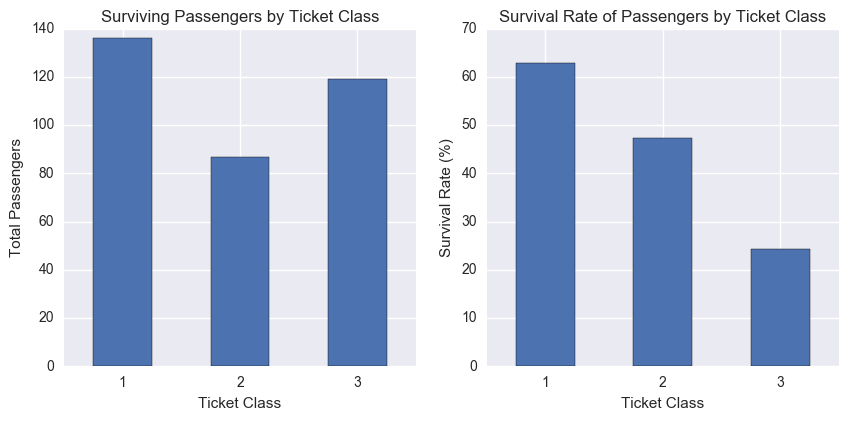

In [243]:
#Visualize the table
plt.figure(figsize=(10,1))
plt.subplots_adjust(top=3.5)
plt.subplot(121)
ax = df_pclass['Survived'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Surviving Passengers by Ticket Class')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Total Passengers')

plt.subplot(122)
ax = df_pclass['SurvivalRate'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Survival Rate of Passengers by Ticket Class')
ax.set_xlabel('Ticket Class')
ax.set_ylabel('Survival Rate (%)')

We can see from the left chart above that the highest number of surviving passengers belong to first-class ticket group which makes sense given that this group is considered priority. Surprisingly, the number of surviving passengers from third-class bypassed second-class passengers. Remember that we haven't taken into account on the number of total passengers for each class.
If we look at the chart on the right, we can see that second-class passengers have significantly higher survival rate compared to third-class. This is because the total of second-class passengers is significantly less compared to third-class.

### 2.2.2 Gender
We will analyze the correlation between passenger's gender and survival.

In [245]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Sex'])

#Count total passenger by gender
df_sex = df.groupby('Sex').count()
df_sex.columns = ['Total Passengers']
print df_sex

        Total Passengers
Sex                     
female               314
male                 577


In [246]:
#Count survivors
df_survived = df[df['Survived'] == 1].groupby('Sex').count()
print df_survived

        Survived
Sex             
female       233
male         109


In [247]:
#Merge the dataframes and compute survival rate for each gender
df_sex = pd.merge(df_sex, df_survived, left_index=True, right_index=True)
df_sex['SurvivalRate'] = (df_sex['Survived'] * 100.0 / df_sex['Total Passengers']).round(2)
df_sex.columns = ['Total', 'Survived', 'SurvivalRate']
df_sex

,Total,Survived,SurvivalRate
Sex,,,
female,314,233,74.20
male,577,109,18.89


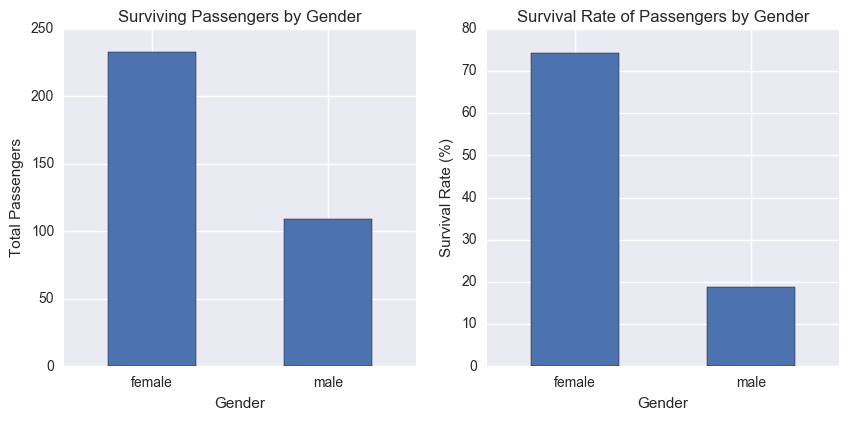

In [248]:
#Visualize the table
plt.figure(figsize=(10,1))
plt.subplots_adjust(top=3.5)
plt.subplot(121)
ax = df_sex['Survived'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Surviving Passengers by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Total Passengers')

plt.subplot(122)
ax = df_sex['SurvivalRate'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Survival Rate of Passengers by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Survival Rate (%)')

You can see from the both charts above that women are much more likely to survive. Given that generally society has a rule about prioritizing the safety of women and children, this makes sense.

### 2.2.3 Age
We will analyze the correlation between passenger's age and survival.

In [271]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Age'])
print df['Age'].isnull().values.any()

True


The data contains age whose value is NaN. This could be because of incomplete data. We need to filter these.

In [272]:
print 'Total passengers: ' + str(df.count()[0])
df = df.dropna()
print 'Total passengers after filter: ' + str(df.count()[0])

Total passengers: 891
Total passengers after filter: 714


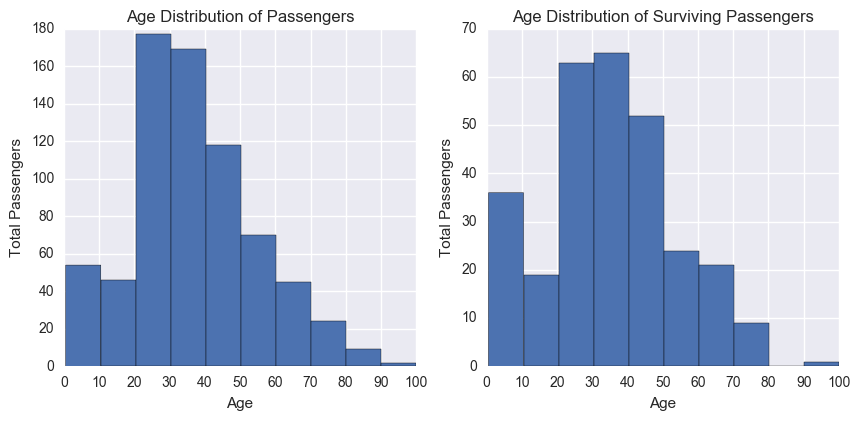

In [273]:
#Visualize age distribution
plt.figure(figsize=(10,1))
plt.subplots_adjust(top=3.5)
plt.subplot(121)
ax = df['Age'].hist(bins=10)
ax.set_title('Age Distribution of Passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Total Passengers')
ax.set_xticks(range(0, 81, 8))
ax.set_xticklabels(range(0, 101, 10))

plt.subplot(122)
ax = df[df['Survived'] == 1]['Age'].hist(bins=10)
ax.set_title('Age Distribution of Surviving Passengers')
ax.set_xlabel('Age')
ax.set_ylabel('Total Passengers')
ax.set_xticks(range(0, 81, 8))
ax.set_xticklabels(range(0, 101, 10))

The statistical distribution between the 2 graphs above seems to be rather similar with the exception of passengers whose age ranging from 0 to 9 having rather high surviving numbers, probably has something with to do with customs of prioritizing the safety of children. This might mean that passenger's age doesn't seem to be a strong contributing factor to survival.

### 2.2.4 Sibling & Spouse
We will analyze the correlation between passenger's siblings / spouse and survival.

In [276]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'SibSp'])

#Count total passenger by sibling & spouse
df_sibsp = df.groupby('SibSp').count()
df_sibsp.columns = ['Total Passengers']
print df_sibsp

       Total Passengers
SibSp                  
0                   608
1                   209
2                    28
3                    16
4                    18
5                     5
8                     7


In [277]:
#Count survivors
df_survived = df[df['Survived'] == 1].groupby('SibSp').count()
print df_survived

       Survived
SibSp          
0           210
1           112
2            13
3             4
4             3


In [278]:
#Merge the dataframes and compute survival rate
df_sibsp = pd.merge(df_sibsp, df_survived, left_index=True, right_index=True)
df_sibsp['SurvivalRate'] = (df_sibsp['Survived'] * 100.0 / df_sibsp['Total Passengers']).round(2)
df_sibsp.columns = ['Total', 'Survived', 'SurvivalRate']
df_sibsp

,Total,Survived,SurvivalRate
SibSp,,,
0,608,210,34.54
1,209,112,53.59
2,28,13,46.43
3,16,4,25.00
4,18,3,16.67


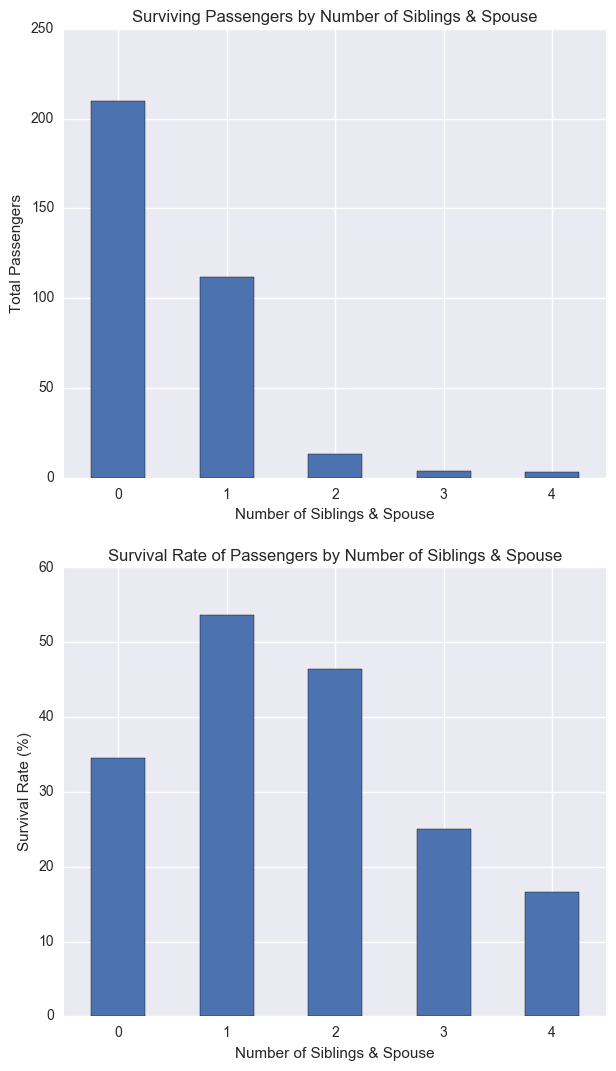

In [279]:
#Visualize the table
plt.figure(figsize=(7,1))
plt.subplots_adjust(top=10)
plt.subplot(211)
ax = df_sibsp['Survived'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Surviving Passengers by Number of Siblings & Spouse')
ax.set_xlabel('Number of Siblings & Spouse')
ax.set_ylabel('Total Passengers')

plt.subplot(212)
ax = df_sibsp['SurvivalRate'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Survival Rate of Passengers by Number of Siblings & Spouse')
ax.set_xlabel('Number of Siblings & Spouse')
ax.set_ylabel('Survival Rate (%)')

From the graphs, the highest number of surviving passengers belongs those who don't have any sibling or spouse relations, while passengers who have 1 sibling or spouse have better chance at surviving. We aren't able to draw any meaningful conclusion for this variable given that the sample size of passengers who have 2 or more siblings or spouse is not sufficient. For now, the best conclusion we can infer from the graph is that passengers who have at least 1 sibling / spouse relation have higher likelihood of surviving.

### 2.2.5 Parents & Children
We will analyze the correlation between passenger's parents / children and survival.

In [290]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Parch'])

#Count total passenger by parents & children
df_parch = df.groupby('Parch').count()
df_parch.columns = ['Total Passengers']
print df_parch

       Total Passengers
Parch                  
0                   678
1                   118
2                    80
3                     5
4                     4
5                     5
6                     1


In [282]:
#Count survivors
df_survived = df[df['Survived'] == 1].groupby('Parch').count()
print df_survived

       Survived
Parch          
0           233
1            65
2            40
3             3
5             1


In [283]:
#Merge the dataframes and compute survival rate
df_parch = pd.merge(df_parch, df_survived, left_index=True, right_index=True)
df_parch['SurvivalRate'] = (df_parch['Survived'] * 100.0 / df_parch['Total Passengers']).round(2)
df_parch.columns = ['Total', 'Survived', 'SurvivalRate']
df_parch

,Total,Survived,SurvivalRate
Parch,,,
0,678,233,34.37
1,118,65,55.08
2,80,40,50.00
3,5,3,60.00
5,5,1,20.00


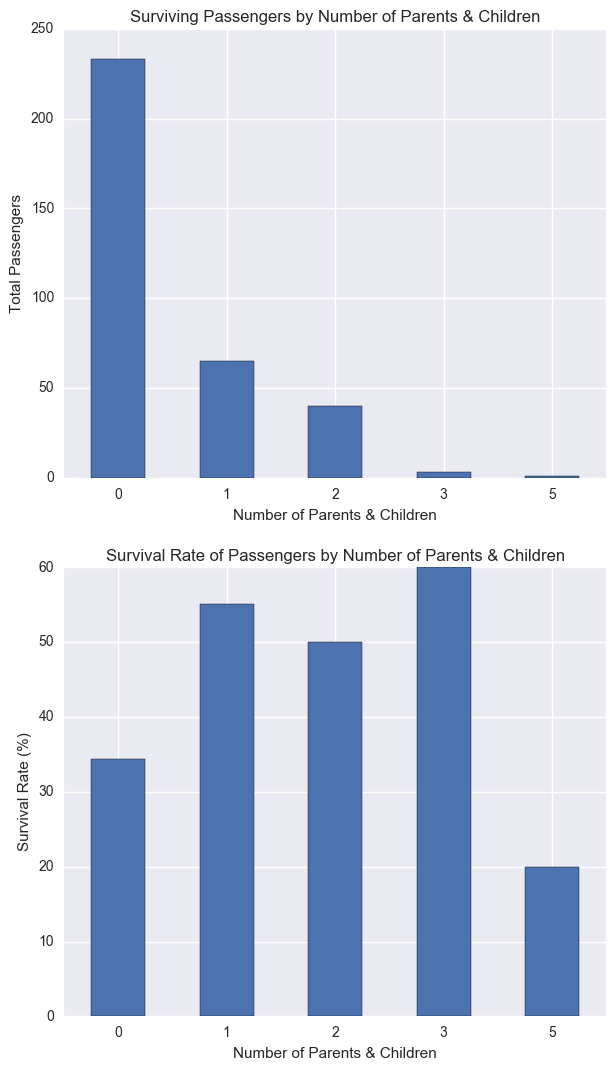

In [284]:
#Visualize the table
plt.figure(figsize=(7,1))
plt.subplots_adjust(top=10)
plt.subplot(211)
ax = df_parch['Survived'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Surviving Passengers by Number of Parents & Children')
ax.set_xlabel('Number of Parents & Children')
ax.set_ylabel('Total Passengers')

plt.subplot(212)
ax = df_parch['SurvivalRate'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Survival Rate of Passengers by Number of Parents & Children')
ax.set_xlabel('Number of Parents & Children')
ax.set_ylabel('Survival Rate (%)')

We will ignore passengers who has more than 2 parents & siblings given that the sample size isn't enough. We can identify that the highest amount of surviving passengers belong to those who don't have any parent or child relations. However, passengers who have at least 1 relation have higher survivability rate.

### 2.2.6 Ticket Fare
We will analyze the correlation between ticket fare and passenger's survival.

In [285]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Fare'])
(df['Fare'] == 0).any()

True

The data contains fares whose value is zero. We need to exclude these.

In [286]:
print 'Total passengers: ' + str(df['Fare'].count())
df = df[df['Fare'] > 0]
print 'Total passengers after filter: ' + str(df['Fare'].count())

Total passengers: 891
Total passengers after filter: 876


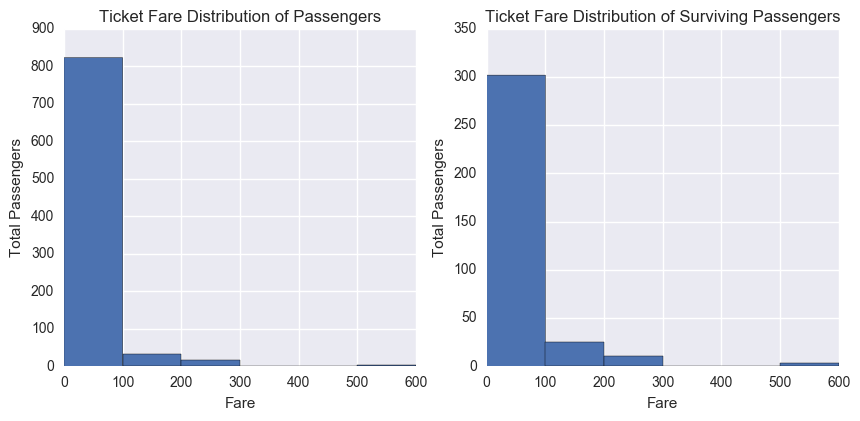

In [287]:
#Visualize ticket fare distribution
plt.figure(figsize=(10,1))
plt.subplots_adjust(top=3.5)
plt.subplot(121)
ax = df['Fare'].hist(bins=6, range=(0, 600))
ax.set_title('Ticket Fare Distribution of Passengers')
ax.set_xlabel('Fare')
ax.set_ylabel('Total Passengers')

plt.subplot(122)
ax = df[df['Survived'] == 1]['Fare'].hist(bins=6, range=(0, 600))
ax.set_title('Ticket Fare Distribution of Surviving Passengers')
ax.set_xlabel('Fare')
ax.set_ylabel('Total Passengers')

Both graphs seem to have similar distribution, meaning that ticket fare doesn't seem to affect passenger's survival.

### 2.2.7 Embarked Port

We will analyze whether the port the passenger embarked affect his/her survival.

In [324]:
#Select necessary columns
df = df_titanic.filter(items=['Survived', 'Embarked'])
print df['Embarked'].isnull().values.any()

True


The data contains NaN values. Eliminate them.

In [325]:
print 'Total passengers: ' + str(df.count()[0])
df = df.dropna()
print 'Total passengers after filter: ' + str(df.count()[0])

Total passengers: 891
Total passengers after filter: 889


In [326]:
#Count total passenger by embarked port
df_embarked = df.groupby('Embarked').count()
df_embarked.columns = ['Total Passengers']
print df_embarked

          Total Passengers
Embarked                  
C                      168
Q                       77
S                      644


In [327]:
#Count survivors
df_survived = df[df['Survived'] == 1].groupby('Embarked').count()
print df_survived

          Survived
Embarked          
C               93
Q               30
S              217


In [328]:
#Merge the dataframes and compute survival rate
df_embarked = pd.merge(df_embarked, df_survived, left_index=True, right_index=True)
df_embarked['SurvivalRate'] = (df_embarked['Survived'] * 100.0 / df_embarked['Total Passengers']).round(2)
df_embarked.columns = ['Total', 'Survived', 'SurvivalRate']
df_embarked

,Total,Survived,SurvivalRate
Embarked,,,
C,168,93,55.36
Q,77,30,38.96
S,644,217,33.70


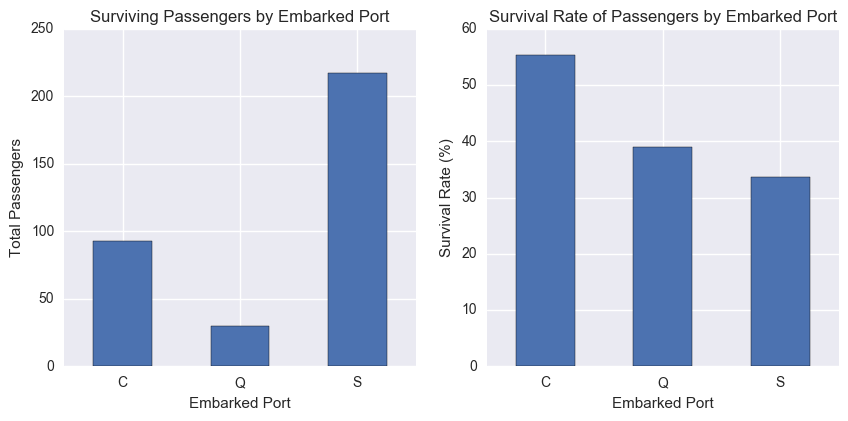

In [333]:
#Visualize the table
plt.figure(figsize=(10,1))
plt.subplots_adjust(top=3.5)
plt.subplot(121)
ax = df_embarked['Survived'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Surviving Passengers by Embarked Port')
ax.set_xlabel('Embarked Port')
ax.set_ylabel('Total Passengers')

plt.subplot(122)
ax = df_embarked['SurvivalRate'].plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Survival Rate of Passengers by Embarked Port')
ax.set_xlabel('Embarked Port')
ax.set_ylabel('Survival Rate (%)')

Port S has the highest number of surviving passengers which isn't surprising given that majority of passengers embarked from there. Interestingly, Port C has the highest survivability rate.

### 2.3. Question 2 : Relationship Between Passenger's Age and Ticket Fare

In [36]:
#Select necessary columns
df = df_titanic.filter(items=['Age', 'Fare'])
print 'Age column contains NaN values: ' + str((df['Age'].isnull().values.any()))
print 'Fare column contains zero values: ' + str((df['Fare'] == 0).any())

Age column contains NaN values: True
Fare column contains zero values: True


We need to exclude NaN and zero values

In [37]:
print 'Total passengers: ' + str(df.shape[0])
df = df[~pd.isnull(df['Age'])]
df = df[df['Fare'] > 0]
print 'Total passengers after filter: ' + str(df.shape[0])

Total passengers: 891
Total passengers after filter: 707


In [38]:
print 'Correlation coefficient: ' + str(df.corr(method='pearson')['Age']['Fare'])

Correlation coefficient: 0.0989808122217


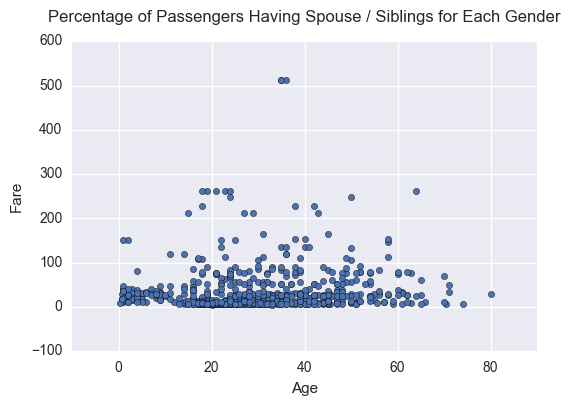

In [39]:
#Visualize the table
ax = df.plot.scatter(x='Age', y='Fare')
ax.set_title('Percentage of Passengers Having Spouse / Siblings for Each Gender', y=1.04)

Using Pearson correlation, we got the coefficient number which is 0.1. This means there is little to no positive correlation between passenger's age and ticket fare.

### 2.4. Question 3 : Passenger's Gender and Dependency on Family Relations

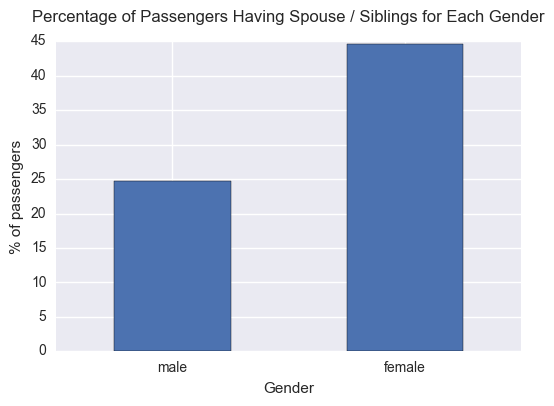

In [35]:
#Select necessary columns
df = df_titanic.filter(items=['Sex', 'SibSp'])
df_male = df[df['Sex'] == 'male']
male_pct = df_male[df_male['SibSp'] > 0].count() * 100 / df_male.count()
df_female = df[df['Sex'] == 'female']
female_pct = df_female[df_female['SibSp'] > 0].count() * 100 / df_female.count()
df = pd.DataFrame(index=['male', 'female'], data={'% has siblings / spouse': [male_pct[0], female_pct[0]]})

#Visualize the table
ax = df.plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Percentage of Passengers Having Spouse / Siblings for Each Gender', y=1.04)
ax.set_xlabel('Gender')
ax.set_ylabel('% of passengers')
ax.get_legend().remove()

We can see that female passengers are more likely to bring their spouse / siblings to the ship compared to their male counterparts.

## 3. Conclusion

From the exploration, we know that there are 7 possible factors which contribute to passenger's survival. The strongest contributing factor would be passenger's gender, significantly favoring towards women. After that, ticket rank would be worth mentioning, with survival rate being directly proportional to how high the rank is. Next noteworthy factor would passenger's relations. Passengers who are associated with at least 1 person in the ship seems to have better chance at surviving than those who aren't.

Passenger's age doesn't seem to affect ticket fare. Both variables also happen to be weak factors at predicting passenger's survival.

We know that female passengers and passengers who have family relation have better chance of surviving. Interestingly, we also found out that women are more likely to bring family to the ship rather than men.

**Note :**  
These findings are tentative given that my knowledge about statistics is quite basic. I look forward to improve this project in the future once I'm confident in my statistical analysis skill.